# Mar 24 Lecture support code

In lecture today, we derived the update rule for gradient descent for Logistic Regression.  In this notebook, we implement it.

**Note:** This notebook was created with the assistance of Google's Gemini language model to demonstrate gradient descent for logistic regression.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
def generate_synthetic_data(n_samples=100, noise=0.5):
    """Generates two overlapping clusters."""
    np.random.seed(0)
    X1 = np.random.randn(n_samples // 2, 2) + np.array([2, 2])
    X2 = np.random.randn(n_samples // 2, 2) + np.array([0, 0])
    X = np.vstack([X1, X2])
    y = np.hstack([np.zeros(n_samples // 2), np.ones(n_samples // 2)])
    return X, y

X, y = generate_synthetic_data()

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias term (intercept)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_val_b = np.c_[np.ones((X_val.shape[0], 1)), X_val]

In [59]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (binary cross-entropy)
def loss(y_true, y_pred):
    epsilon = 1e-15  # Avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon) # clip for stability
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient descent with theta tracking and decision boundary visualization
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, batch_size=32, plot_interval=1, max_plot=10):
    m, n = X.shape
    theta = np.zeros(n)
    losses = []
    val_losses = []
    theta_history = []

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1 # Use X_train here!
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1 # Use X_train here!
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    num_plots = 0
    num_batches = 0
    for i in range(n_iterations):
        # Shuffle the data
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j + batch_size]
            y_batch = y_shuffled[j:j + batch_size]

            z = np.dot(X_batch, theta)
            y_pred = sigmoid(z)
            gradient = np.dot(X_batch.T, (y_pred - y_batch)) / len(y_batch)
            theta -= learning_rate * gradient

            num_batches += 1
            if (num_batches % plot_interval == 0) and (num_plots <= max_plot):
                num_plots+=1
                Z = sigmoid(np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], theta))
                Z = Z.reshape(xx.shape)

                plt.figure(figsize=(8, 6))
                plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
                plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu) # Use X_train and y_train here!
                plt.xlabel('Feature 1')
                plt.ylabel('Feature 2')
                plt.title(f'Decision Boundary after {num_batches} batches')
                plt.show()

        z_full = np.dot(X, theta)
        y_pred_full = sigmoid(z_full)
        losses.append(loss(y, y_pred_full))

        val_pred = sigmoid(np.dot(X_val_b, theta))
        val_losses.append(loss(y_val, val_pred))
        theta_history.append(theta.copy())

    return theta, losses, val_losses, theta_history


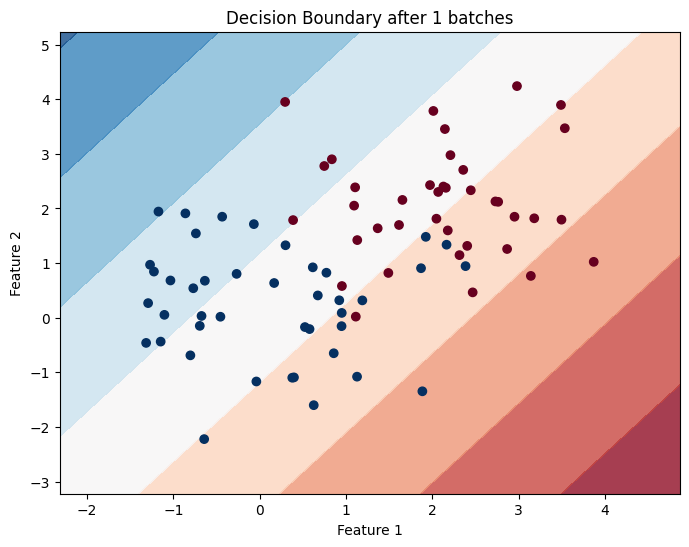

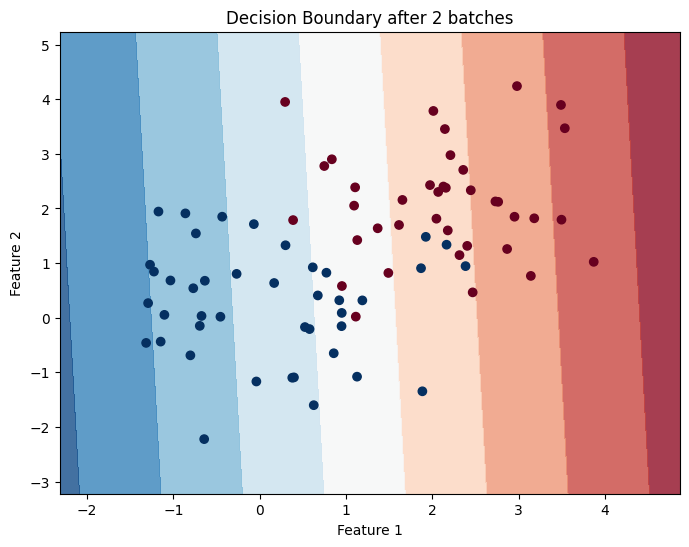

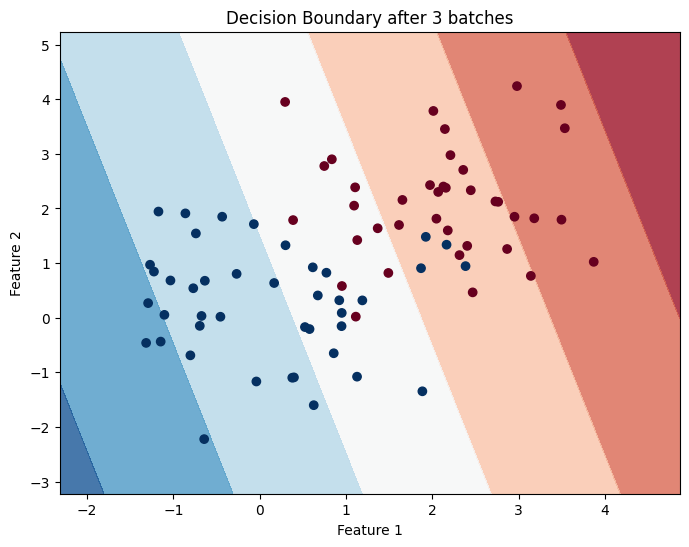

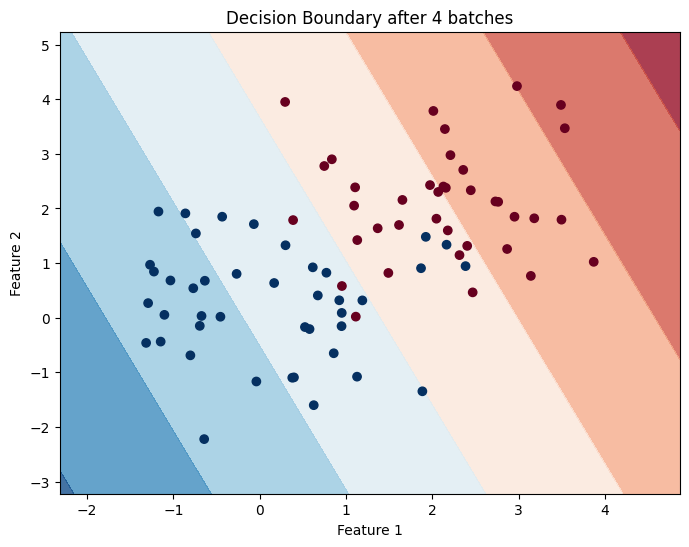

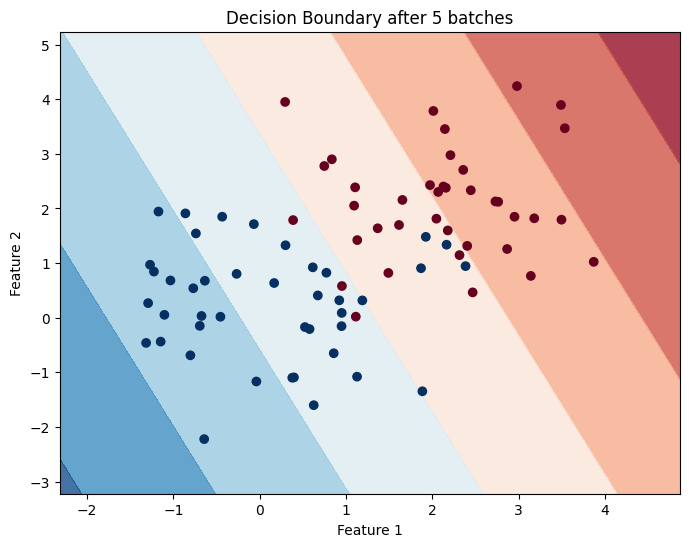

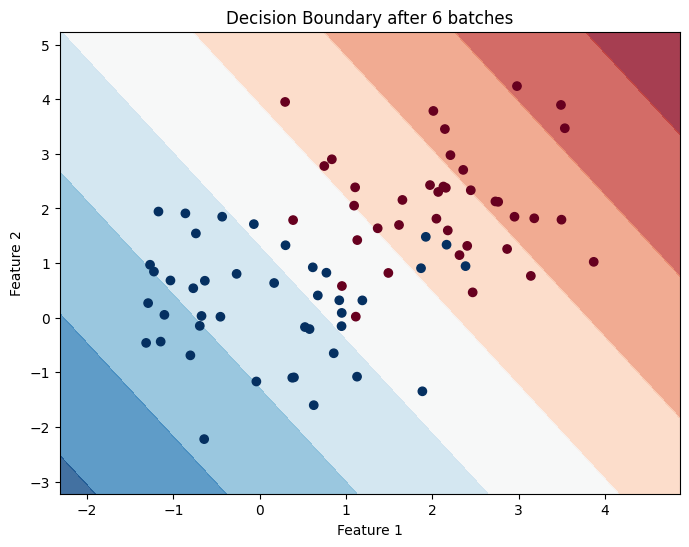

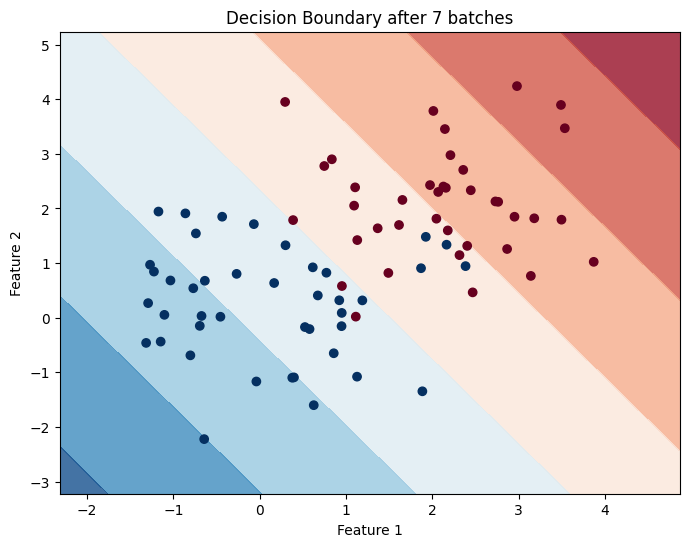

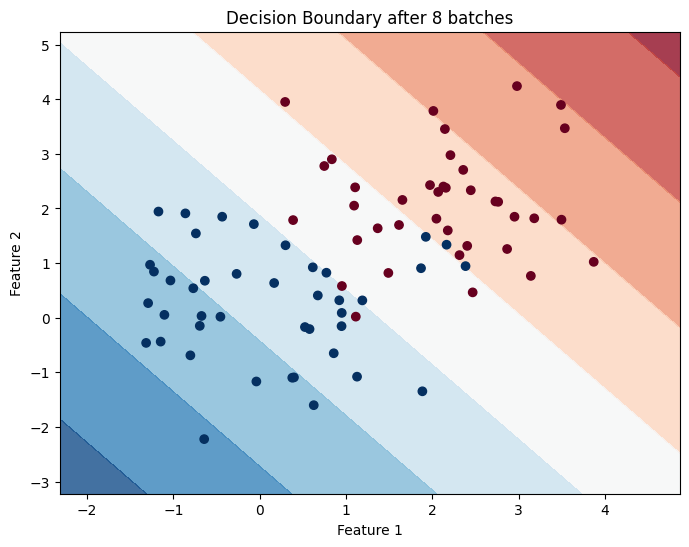

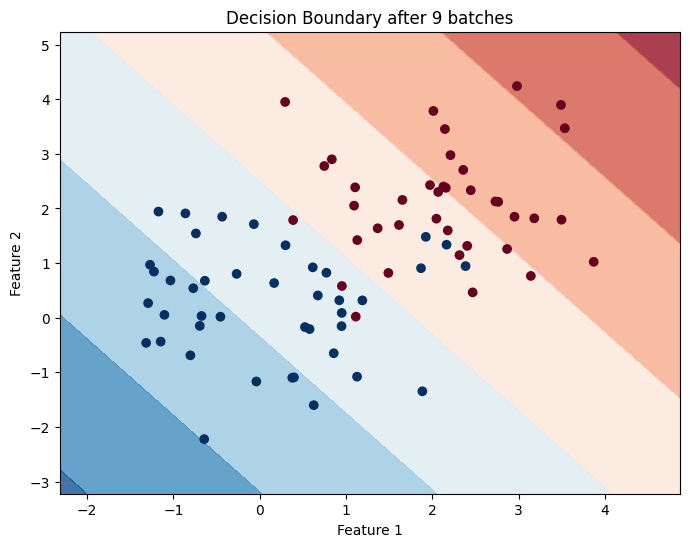

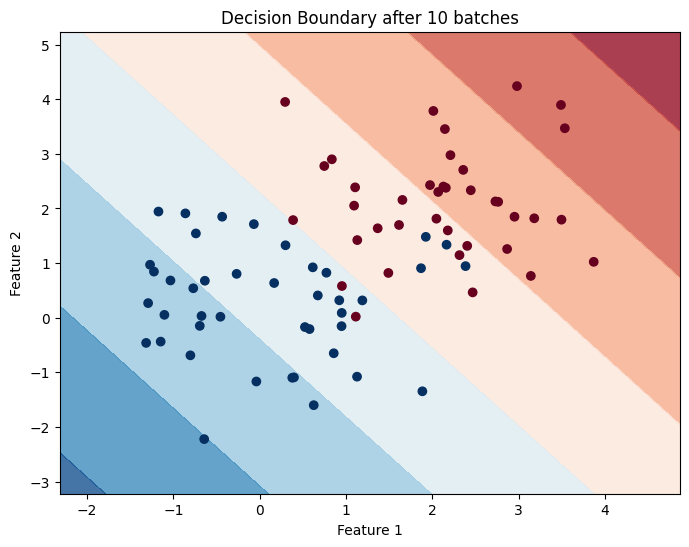

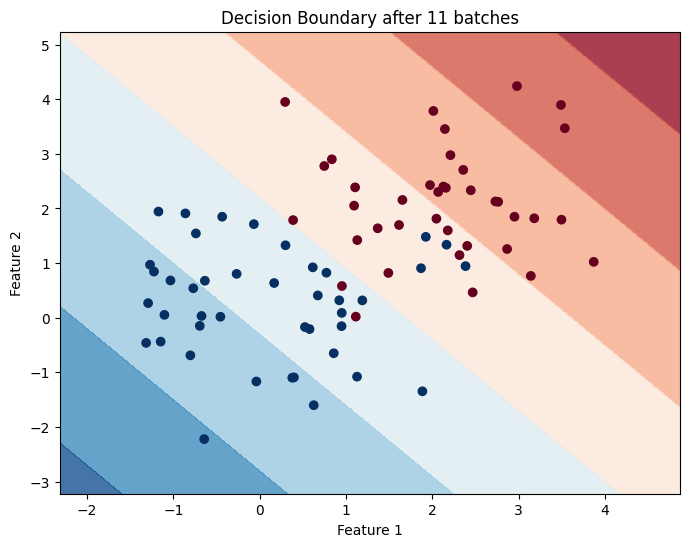

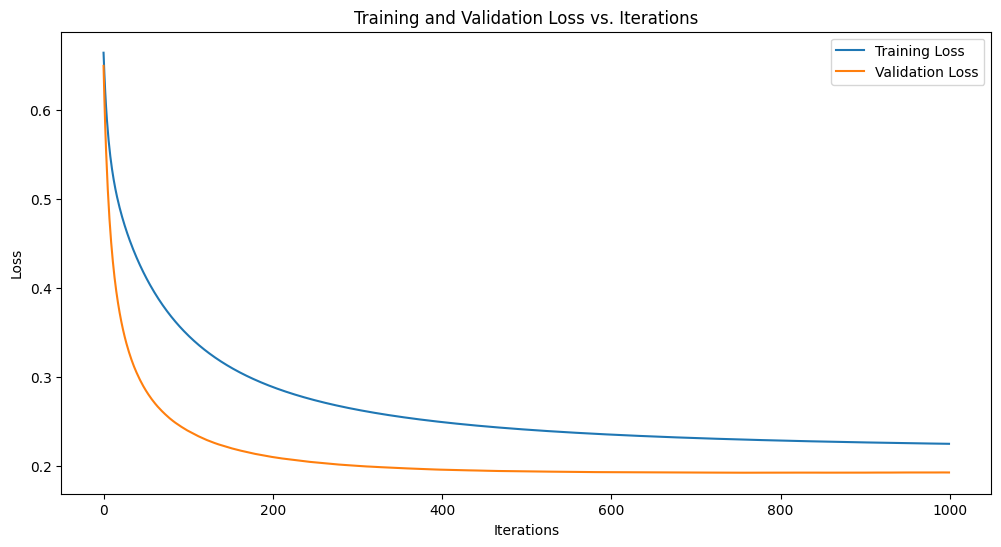

In [75]:
# Train the model
theta, train_losses, val_losses, theta_history = gradient_descent(X_train_b, y_train, batch_size=1, learning_rate=0.001)

# Plot the loss curve
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Iterations')
plt.legend()
plt.show()

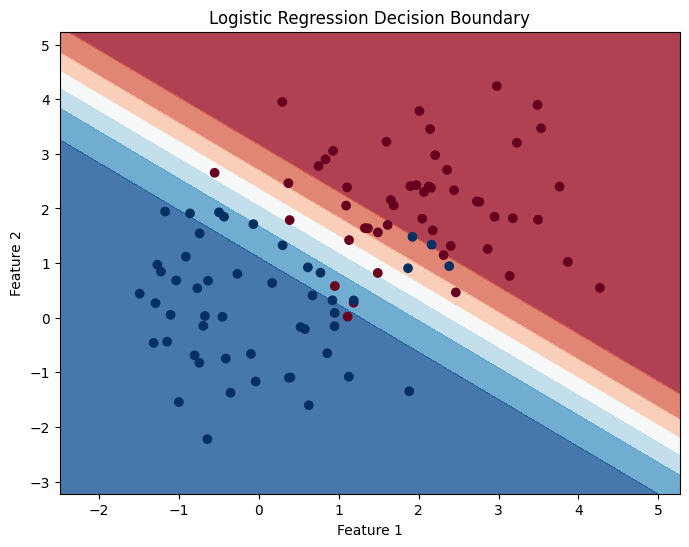

In [69]:
# Visualize the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = sigmoid(np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], theta))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [70]:
# Print the final theta
print("Final theta:", theta)


Final theta: [ 4.29274631 -1.64898687 -1.90354468]


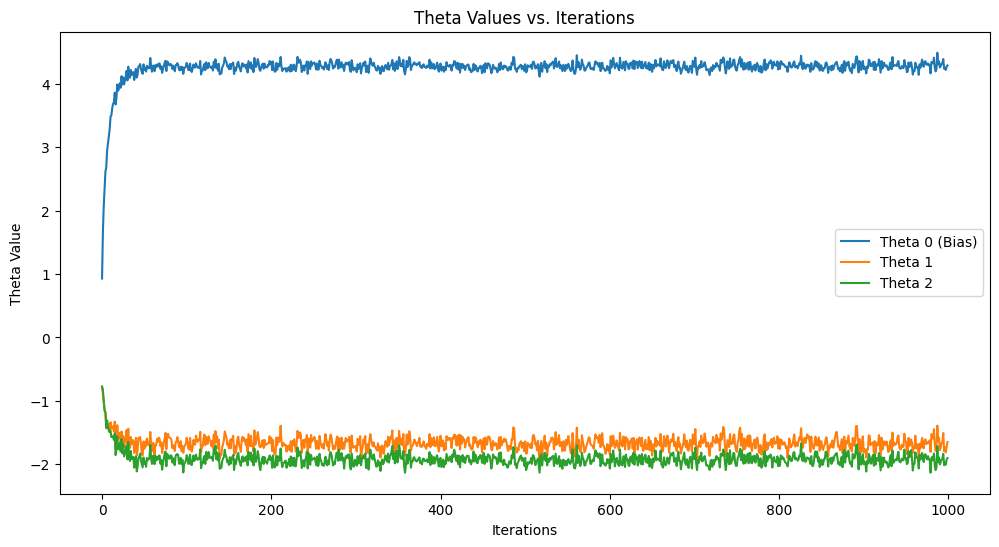

In [71]:
# Visualize theta changes
theta_history = np.array(theta_history)
plt.figure(figsize=(12, 6))
plt.plot(theta_history[:, 0], label='Theta 0 (Bias)')
plt.plot(theta_history[:, 1], label='Theta 1')
plt.plot(theta_history[:, 2], label='Theta 2')
plt.xlabel('Iterations')
plt.ylabel('Theta Value')
plt.title('Theta Values vs. Iterations')
plt.legend()
plt.show()